# Machine Learning 42: Heirarchical_clustering

## What is hierarchical clustering

Hierarchical clustering groups data into a tree of nested clusters (a hierarchy). You can cut that tree at any level to get a desired number of clusters — or inspect the whole nested structure to understand relationships between points.

## Agglomerative vs Divisive

* **Agglomerative (bottom-up):** start with each point as its own cluster, then iteratively merge the closest clusters until one remains.
* **Divisive (top-down):** start with all points in one cluster and iteratively split clusters.
  Agglomerative is far more commonly used in practice because merging by distances is straightforward; divisive is conceptually simple but less commonly implemented.

## Step-by-step (how it works)

1. **Distance matrix:** compute pairwise distances between points (Euclidean, Manhattan, etc.).
2. **Linkage rule:** decide how to measure distance between clusters (single, complete, average, Ward).

   * *Single linkage:* distance between nearest members.
   * *Complete linkage:* distance between farthest members.
   * *Average linkage:* average pairwise distance.
   * *Ward linkage:* merge clusters that minimize the increase in total within-cluster variance (works with Euclidean).
3. **Merge/split:** based on chosen rule, merge the closest clusters (agglomerative) or split (divisive).
4. **Dendrogram:** a tree diagram that shows the sequence of merges and the distance at which each merge happened — tall vertical jumps indicate merging far-apart clusters. Use the dendrogram to choose a cut height (or number of clusters).

## Quick intuition: reading a dendrogram

* Leaves = original samples.
* Each U-shaped link shows a merge; the vertical height is the distance at which clusters merged.
* Cutting the tree horizontally at a chosen height gives the flat clustering at that distance. 

## Pros & cons vs K-means

**Advantages of hierarchical (vs K-means)**

* No need to pre-specify `k` (you can cut the tree at different levels).
* Produces a full hierarchy — useful for exploring nested group structure and for interpretability.
* Can use many linkage rules that capture different cluster shapes.
  
**Disadvantages**

* **Scalability:** hierarchical clustering (naive implementations) requires O(n²) memory/time for distance matrix and is therefore costly for large datasets (K-means scales much better).
* **Sensitive to noise/outliers:** depending on linkage, a single outlier can change merges.
* **Choice of linkage/distance changes results**; K-means is more stable for spherical, equal-variance clusters. 

When to use each:

* Use **hierarchical** when you want interpretability and a multi-scale view of clustering or when dataset size is moderate (hundreds–thousands).
* Use **K-means** when you need a fast algorithm on large datasets and you believe clusters are roughly spherical and balanced.


In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# clustering libraries
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

# data generation
from sklearn.datasets import make_blobs

In [2]:
# remove warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Generate a random dataset with 100 samples and 3 features
X, y = make_blobs(n_samples=100, centers=11, n_features=3, random_state=42)

In [4]:
data = pd.DataFrame(X, columns=['Feature1', 'Feature2', 'Feature3'])
data['Target'] = y
print(data.head())

   Feature1  Feature2  Feature3  Target
0 -9.130280  4.668347  2.367818       2
1 -4.821087 -2.313693 -1.309328       7
2 -6.456042 -3.174814  0.042666       5
3  0.954237 -5.818839 -8.031912      10
4 -3.144757  7.992734  4.478123       0


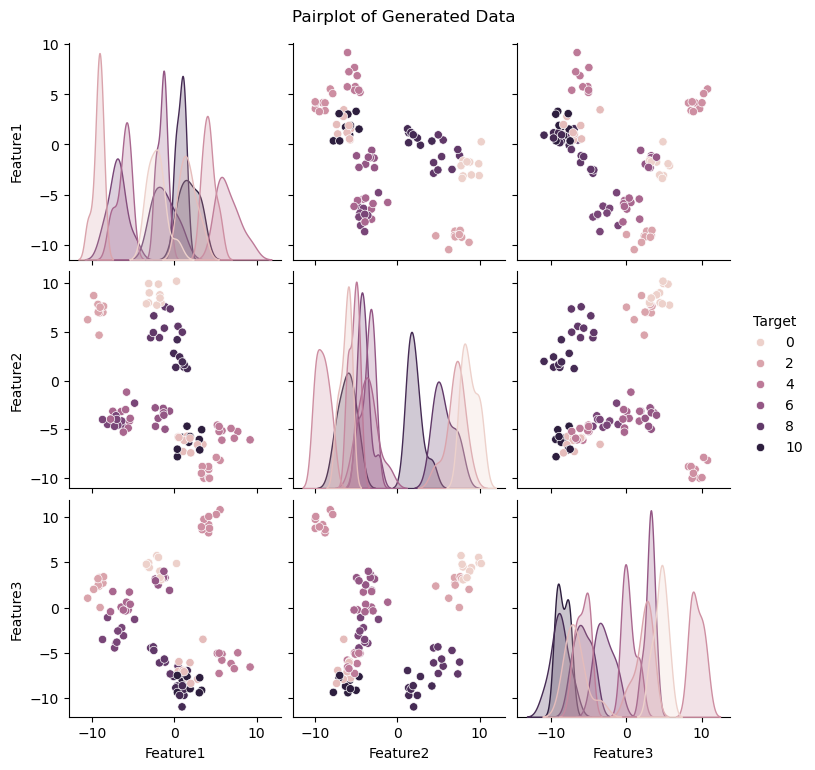

In [5]:
# Visualize the dataset
sns.pairplot(data, hue='Target')
plt.suptitle('Pairplot of Generated Data', y=1.02)
plt.show()

In [6]:
# Perform hierarchical clustering
hc = AgglomerativeClustering(n_clusters=11, metric='euclidean', linkage='ward')
data['Cluster'] = hc.fit_predict(X)

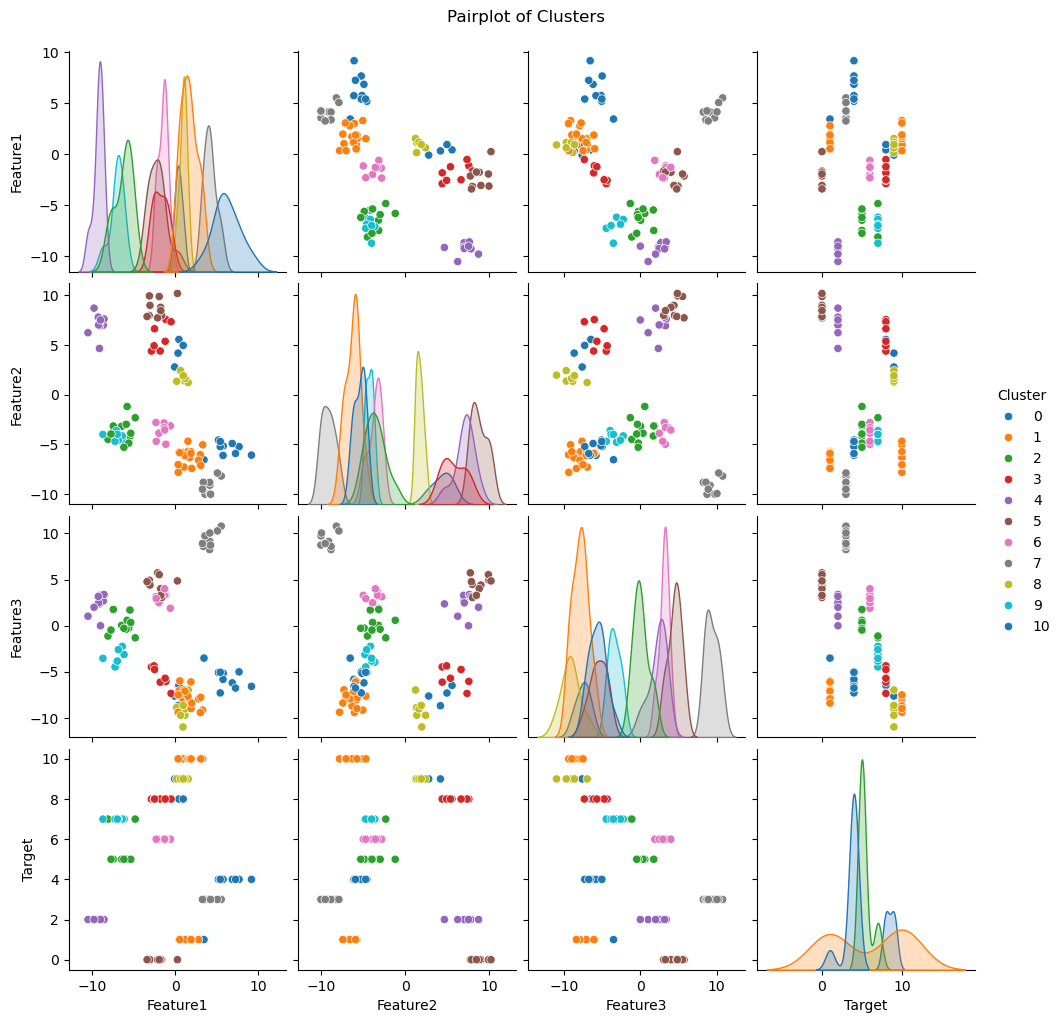

In [7]:
# Visualize the clusters
sns.pairplot(data, hue='Cluster', palette='tab10')
plt.suptitle('Pairplot of Clusters', y=1.02)
plt.show()

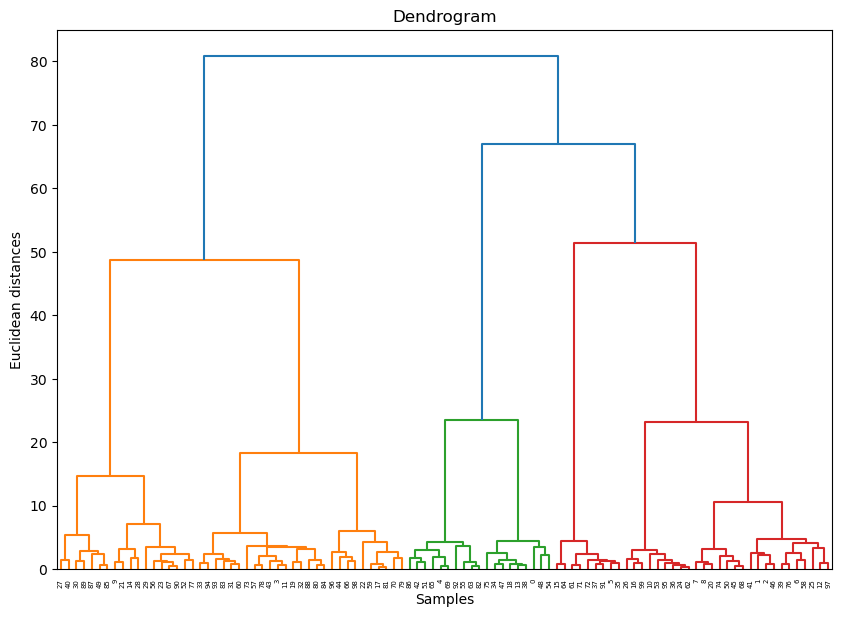

In [8]:
# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Euclidean distances')
plt.show() 

In [9]:
# Display the first few rows of the dataset with clusters
print(data.head())

   Feature1  Feature2  Feature3  Target  Cluster
0 -9.130280  4.668347  2.367818       2        4
1 -4.821087 -2.313693 -1.309328       7        2
2 -6.456042 -3.174814  0.042666       5        2
3  0.954237 -5.818839 -8.031912      10        1
4 -3.144757  7.992734  4.478123       0        5
